In [ ]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as seaborn
import os
import numpy as np
%matplotlib inline

In [5]:
# list movie file names
!ls input

BlacKkKlansman.wav
aStarIsBorn.wav
blackPanther.wav
bohemianRhapsody.wav
greenBook.wav
roma.wav
theFavourite.wav
vice.wav


## Kaggle method
https://www.kaggle.com/vinayshanbhag/visualizing-audio-data/notebook

ValueError: too many values to unpack (expected 2)

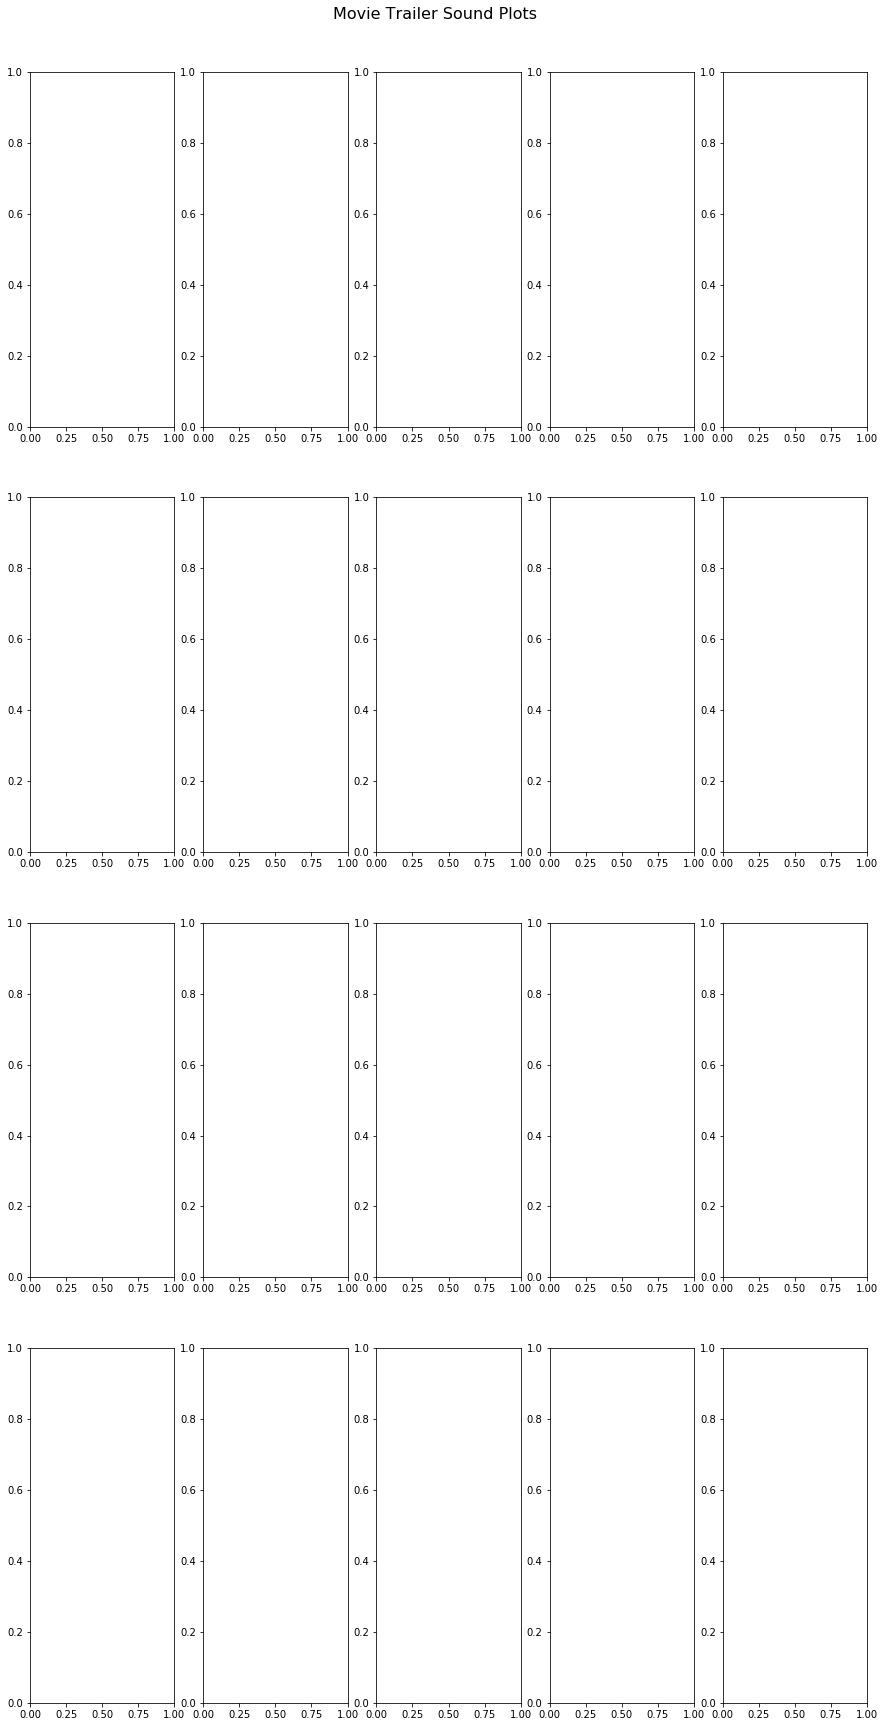

In [10]:
files = sorted(os.listdir("input"))
columns=5
fig, ax = plt.subplots(int(np.ceil(len(files)/columns))*2,columns,figsize=(15,30))
fig.suptitle("Movie Trailer Sound Plots", x=0.5, y=0.91, fontsize=16)
for idx, file in enumerate(files):
    r,c = idx//columns*2, idx%columns
    rate, data = wav.read("input/{}".format(file))
    f, t, Sxx = signal.spectrogram(data, fs=rate)
    d = 20*np.log10(Sxx+1e-10)
    ax[r,c].pcolormesh(t,f,d, vmin=-1e1,vmax=d.max())
    ax[r,c].set_title(file)
    if not c and not r:
        ax[r,c].set_xlabel("time")
        ax[r,c].set_ylabel("frequency")
        ax[r,c].set_xticks([])
        ax[r,c].set_frame_on(False)
        ax[r,c].set_yticks([])
    else: ax[r,c].axis("off")
    
    norm_data = (data -data.mean())/data.std()
    ax[r+1,c].plot(norm_data,lw=0.03)
    ax[r+1,c].axis("off") 

plt.subplots_adjust(wspace=0.05, hspace=0.1)

In [ ]:
fig, ax = plt.subplots(int(np.ceil(len(files)/columns)),columns,figsize=(10,10))
fig.suptitle("Spectral Power Density", x=0.5, y=1.05, fontsize=16)
for idx, file in enumerate(files):
    r,c = idx//columns, idx%columns
    rate, data = wav.read("../input/Training/{}".format(file))
    f, Pxx = signal.welch(data, fs=rate)
    ax[r,c].semilogy(f,Pxx)
    ax[r,c].set_title(file);
    if not c and not r:
        ax[r,c].set_xlabel("frequency")
        ax[r,c].set_ylabel("power");
    
plt.tight_layout()

## Homegrown Method

In [45]:
import wave
import sys

C:\Users\carte\AppData\Local\conda\conda\envs\SarahClassDev\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':
C:\Users\carte\AppData\Local\conda\conda\envs\SarahClassDev\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


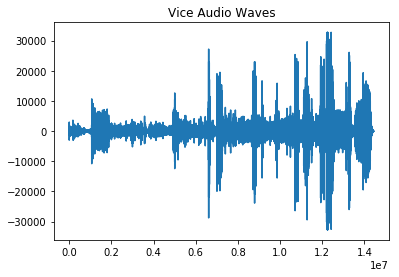

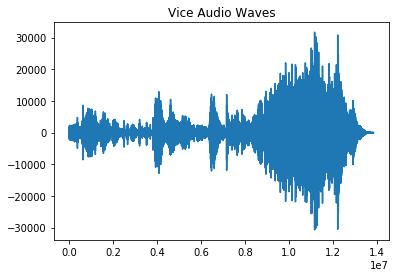

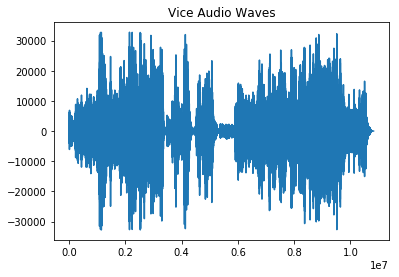

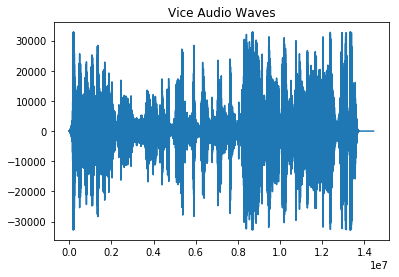

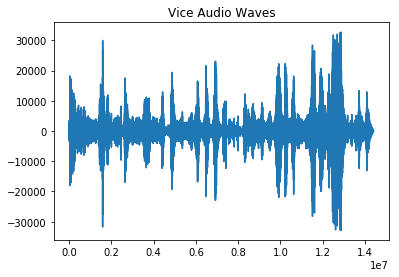

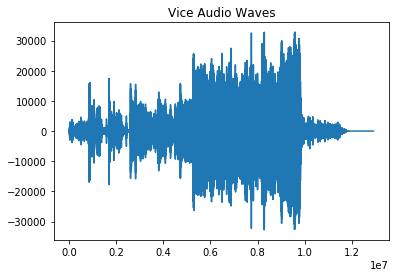

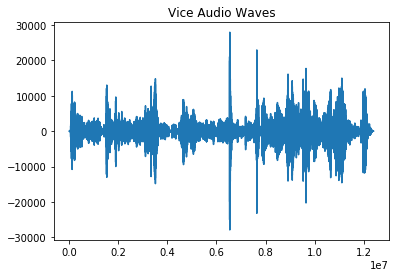

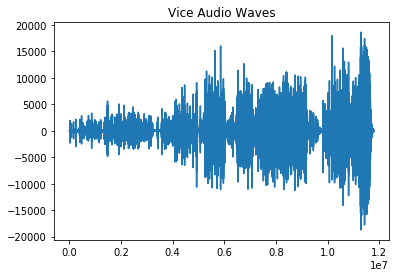

In [48]:
files = sorted(os.listdir("input"))

for file in files:
    # one by one
    vice = wave.open('input/' + file,'r')

    #Extract Raw Audio from Wav File
    signal = vice.readframes(-1)
    signal = np.fromstring(signal, 'Int16')
    #use pd diff
    signal = pd.Series(signal).diff(1)

    #If Stereo
    # if spf.getnchannels() == 2:
    #     print('Just mono files')
    #     sys.exit(0)

    plt.figure(1)
    plt.title(file + ' Audio Waves')
    plt.plot(signal)
    plt.show()